In [ ]:
######################################################################### 
# SAi Vivek Kammari
# SEM II - 2020
# Masters of Data Science
#a1807677



#########################################################################

# TASK1 PCA

In [7]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler



def covarianvce(x):
    matrix = np.zeros((x[0].size, x[0].size))
    mu = np.mean(x, axis=0)
    norm_X = x-mu

   # compute covariance of x
    for (i,j) in np.ndindex(matrix.shape):
        matrix[i, j] = np.dot(norm_X[:,i], norm_X[:,j])/len(x)

    return matrix

In [8]:


def PCA_fit(Data,number_components):
    # computing the mean C and  covariance matrix  
    mean = np.mean(Data.T, axis=1)
    C = Data - mean
    COV = covarianvce(C)
    # getting the eigen values and eigen vectors from the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eigh(COV)
    idx = np.argsort(eigen_values)[::-1]
    eigen_vectors = eigen_vectors[:,idx]
    # sort eigenvectors 
    eigen_values = eigen_values[idx]
    # Reducting the components
    eigen_vectors = eigen_vectors[:, :number_components]
    Project_matrix = np.dot(eigen_vectors.T, C.T).T
    return mean, eigen_vectors, Project_matrix , eigen_values

In [9]:
def PCA_transform(Data,mean,eigen_vectorss):
    # center columns by subtracting column means of Training
    C = Data - mean
    # project the data
    Projected_Data = np.dot(eigen_vectorss.T, C.T).T
    return Projected_Data

In [10]:
print("------------TASK1 PCA fit and Transform functions Defined------------")
print()

------------TASK1 PCA fit and Transform functions Defined------------



# TASK 2 KNN ACCURACY VS NUMBER OF DIMENSIONS

In [33]:
print()
print("-----------TASK 2 Reducing the dimensions using PCA and Classifying using K-1--------")
classifier = KNeighborsClassifier(n_neighbors =1)


train = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//mnist_train.csv", header = None)
test = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//mnist_test.csv", header = None)

y_tr = train[0]
x_tr = train.drop([0], axis =1)
x_tr.shape 
x = np.array(x_tr.iloc[:,:])
y = np.array(y_tr)
y=y.astype('int')

y_te = test[0]
x_te = test.drop([0], axis =1)
x_test = np.array(x_te.iloc[:,:])
y_test = np.array(y_te)

#------x, y are the train datasets x_test and y_test are the test datasets 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x )
x= scaler.transform(x)

scaler.fit(x_test )
x_test= scaler.transform(x_test)



KNN = classifier.fit(x ,y)
    
y_pred = KNN.predict( x_test )
    
acc = accuracy_score(y_test ,y_pred)
#accuracy.append(acc)
    
print(metrics.classification_report(y_test ,y_pred))
print(metrics.confusion_matrix(y_test ,y_pred))


l1 = list(range(1, 256,3))#[2,5,10,20,50,100,150,200,256] #[300,350,400,450,500,550,600,650,700,784]

accuracy = []
for l in l1:
    
# Project the data onto the 2 primary principal components
    m1,ev1,pro, eval1 =PCA_fit(x,l)
    
    
    X_projected = PCA_transform(x,m1,ev1)

    print('Shape of X:', x.shape)

    print('Shape of transformed X:', X_projected.shape)


    print("Checking---------------------------------------------------------------------------")

    

    X_test_projected = PCA_transform(x_test, m1, ev1)

    print('Shape of X_test:', x_test.shape)

    print('Shape of transformed X_test:', X_test_projected.shape)


    print("Checking---------------------------------------------------------------------------")

    KNN = classifier.fit(X_projected ,y)
    
    y_pred_i = KNN.predict( X_test_projected)
    
    acc = accuracy_score(y_test ,y_pred_i)
    accuracy.append(acc)
    print(metrics.classification_report(y_test ,y_pred_i))
    #print(metrics.confusion_matrix(y_test ,y_pred_i))

    
print("Accuracy list of K-1", accuracy)











-----------TASK 2 Reducing the dimensions using PCA and Classifying using K-1--------
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        99
         1.0       0.93      0.99      0.96       113
         2.0       0.95      0.84      0.89        94
         3.0       0.86      0.76      0.81       108
         4.0       0.91      0.96      0.93        93
         5.0       0.90      0.88      0.89        96
         6.0       0.88      0.99      0.93       101
         7.0       0.94      0.79      0.86       103
         8.0       0.89      0.86      0.87        99
         9.0       0.78      0.93      0.85        94

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

[[ 98   0   0   0   0   0   1   0   0   0]
 [  0 112   0   0   0   0   0   0   1   0]
 [  1   2  79   3   1   2   4   0   2   0]
 [  5   2   1  82   1   5

Shape of X: (6000, 784)
Shape of transformed X: (6000, 22)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 22)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        99
         1.0       0.97      0.98      0.97       113
         2.0       0.95      0.87      0.91        94
         3.0       0.88      0.78      0.82       108
         4.0       0.93      0.88      0.91        93
         5.0       0.85      0.88      0.86        96
         6.0       0.94      0.99      0.97       101
         7.0       0.92      0.75      0.82       103
         8.0       0.86      0.89      0.88        99
         9.0       0.71      0.93      0.80        94

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000


Shape of X: (6000, 784)
Shape of transformed X: (6000, 46)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 46)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.97      0.99      0.98       113
         2.0       0.98      0.88      0.93        94
         3.0       0.91      0.81      0.86       108
         4.0       0.94      0.90      0.92        93
         5.0       0.88      0.90      0.89        96
         6.0       0.92      0.99      0.95       101
         7.0       0.93      0.79      0.85       103
         8.0       0.89      0.91      0.90        99
         9.0       0.75      0.95      0.84        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000


Shape of X: (6000, 784)
Shape of transformed X: (6000, 70)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 70)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.97      0.99      0.98       113
         2.0       0.98      0.88      0.93        94
         3.0       0.92      0.81      0.86       108
         4.0       0.91      0.92      0.91        93
         5.0       0.89      0.89      0.89        96
         6.0       0.87      1.00      0.93       101
         7.0       0.96      0.80      0.87       103
         8.0       0.88      0.90      0.89        99
         9.0       0.77      0.91      0.84        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000


Shape of X: (6000, 784)
Shape of transformed X: (6000, 94)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 94)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.97      0.99      0.98       113
         2.0       0.97      0.88      0.92        94
         3.0       0.93      0.82      0.87       108
         4.0       0.90      0.92      0.91        93
         5.0       0.92      0.90      0.91        96
         6.0       0.88      1.00      0.94       101
         7.0       0.96      0.79      0.87       103
         8.0       0.90      0.91      0.90        99
         9.0       0.75      0.91      0.82        94

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000


Shape of X: (6000, 784)
Shape of transformed X: (6000, 118)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 118)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        99
         1.0       0.97      0.99      0.98       113
         2.0       0.95      0.88      0.92        94
         3.0       0.92      0.81      0.86       108
         4.0       0.91      0.94      0.92        93
         5.0       0.91      0.90      0.91        96
         6.0       0.89      1.00      0.94       101
         7.0       0.98      0.80      0.88       103
         8.0       0.89      0.90      0.89        99
         9.0       0.76      0.93      0.84        94

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      100

Shape of X: (6000, 784)
Shape of transformed X: (6000, 142)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 142)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        99
         1.0       0.97      0.99      0.98       113
         2.0       0.95      0.86      0.91        94
         3.0       0.91      0.80      0.85       108
         4.0       0.91      0.92      0.91        93
         5.0       0.90      0.91      0.90        96
         6.0       0.88      0.99      0.93       101
         7.0       0.95      0.80      0.87       103
         8.0       0.91      0.90      0.90        99
         9.0       0.75      0.91      0.83        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      100

Shape of X: (6000, 784)
Shape of transformed X: (6000, 166)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 166)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98        99
         1.0       0.95      0.99      0.97       113
         2.0       0.95      0.87      0.91        94
         3.0       0.90      0.79      0.84       108
         4.0       0.89      0.91      0.90        93
         5.0       0.89      0.89      0.89        96
         6.0       0.88      0.99      0.93       101
         7.0       0.94      0.79      0.86       103
         8.0       0.90      0.90      0.90        99
         9.0       0.75      0.89      0.82        94

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      100

Shape of X: (6000, 784)
Shape of transformed X: (6000, 190)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 190)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        99
         1.0       0.95      0.99      0.97       113
         2.0       0.95      0.88      0.92        94
         3.0       0.90      0.79      0.84       108
         4.0       0.91      0.92      0.92        93
         5.0       0.89      0.88      0.88        96
         6.0       0.89      0.99      0.94       101
         7.0       0.95      0.81      0.87       103
         8.0       0.91      0.90      0.90        99
         9.0       0.76      0.91      0.83        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      100

Shape of X: (6000, 784)
Shape of transformed X: (6000, 214)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 214)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        99
         1.0       0.95      0.99      0.97       113
         2.0       0.95      0.87      0.91        94
         3.0       0.90      0.78      0.84       108
         4.0       0.92      0.91      0.92        93
         5.0       0.89      0.89      0.89        96
         6.0       0.88      0.99      0.93       101
         7.0       0.94      0.82      0.87       103
         8.0       0.91      0.88      0.89        99
         9.0       0.77      0.93      0.84        94

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      100

Shape of X: (6000, 784)
Shape of transformed X: (6000, 238)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 238)
Checking---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        99
         1.0       0.95      0.99      0.97       113
         2.0       0.95      0.86      0.91        94
         3.0       0.88      0.78      0.83       108
         4.0       0.92      0.94      0.93        93
         5.0       0.88      0.89      0.88        96
         6.0       0.88      0.99      0.93       101
         7.0       0.93      0.82      0.87       103
         8.0       0.91      0.87      0.89        99
         9.0       0.80      0.91      0.85        94

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      100

In [34]:
# Analyzing the variance of dataset captured by each eigen value

#m0,ev0,pro0, eval0 =PCA_fit(x,256)
    
#totalsum =sum(eval0)
#variablesEx = [(i/totalsum) for i in sorted(eval0,reverse =True)]
#print("Variance captured")
#print(variablesEx)

#X_projected0 = PCA_transform(x,m1,ev0)

#print('Shape of X:', x.shape)

#print('Shape of transformed X:', X_projected0.shape)

---Plotiing DImensions vs K-1 Error and Accuracy---------------


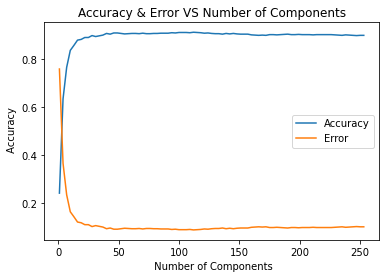

Maximum K-1 classification accuracy(%) : 91.4   At components : 111


In [36]:
print("---Plotiing DImensions vs K-1 Error and Accuracy---------------")
Error =[]
for l in accuracy:
    error = 1-l
    Error.append(error)

plt.plot(l1,accuracy,label='Accuracy')
plt.plot(l1,Error,label='Error')

plt.legend()
plt.xlabel(" Number of Components")
plt.ylabel(" Accuracy")
plt.title ("Accuracy & Error VS Number of Components")
plt.show()

features =accuracy.index(max(accuracy))
print( "Maximum K-1 classification accuracy(%) :",max(accuracy)*100, "  At components :", features*3)

# TASK 5 ADDING NOISE

In [16]:
# checking the accuracy when the number of features are fixed and the the standard deviation of the noise varies

from sklearn import svm
svmmodel = svm.SVC(kernel ='linear', gamma = 'auto', C =  1)



print("-------------TASK 5--Aadding 256 Noisy Dimensions --> Reduding the Dimensions Using PCA --> Classifying (K-1, SVM)")

print("Standard Deviation-[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]") 

l2 =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # list of standard deviations sigma 
#l3 = [10,100,200,256]
ack = []  # empty list to store accuracy of K-1 at various standard deviations
ac_svm =[]# empty list to store accuracy of SVM at various standard deviations

    
for l in l2:
    
    mu, sigma = 0, l
    noise = np.random.normal(mu, sigma, [6000,256]) # noise for the training set 
    ndf = pd.DataFrame(data=noise) # noise dataframe
    dx_tr = x_tr # copy of the train dataset
    df = pd.concat([dx_tr , ndf], axis=1) # combined dataset (train + noise)
    dfx = np.array(df.iloc[:,:])

#u, sigma = 0, 0.03
# adding noise to the test datest
    test_noise = np.random.normal(mu, sigma, [1000,256]) 
    test_ndf = pd.DataFrame(data=test_noise)
    dx_te= x_te
    test_df = pd.concat([dx_te , test_ndf], axis=1)
    test_dfx =np.array(test_df.iloc[:,:])

    if sigma == 1:
        train_df1 = dfx
        test_df1 = test_dfx
        
    # applying pca on the new dataset
    #m1,ev1,pro=PCA_fit(x,l)
    
    m2,ev2,pro2, eval2 = PCA_fit(dfx,200)
    

    dX_projected = PCA_transform(dfx,m2,ev2)

    #print('Shape of X:', df.shape)

    #print('Shape of transformed X:', dX_projected.shape)


# transfrming the new test dataset
    dX_test_projected = PCA_transform(test_dfx,m2,ev2)

    #print('Shape of X:', test_df.shape)

    #print('Shape of transformed X:', dX_test_projected.shape)

    # Classification of the redcued dataset with k-1

    KNN = classifier.fit(dX_projected ,y)
    
    dy_pred_i = KNN.predict( dX_test_projected)
    
    acc = accuracy_score(y_test ,dy_pred_i)
    ack.append(acc)
    
    #print(metrics.classification_report(y_test ,dy_pred_i))
    
    #print("SVM Classification---------------------------------------------")
    
    svmmodel.fit(dX_projected ,y)


    y_svm_predicticted = svmmodel.predict(dX_test_projected)
    svmaccuracy = accuracy_score(y_test ,y_svm_predicticted ) 
    ac_svm.append(svmaccuracy)
    print()
    
    #print("SVM Comparision: ")
    
    #print(metrics.classification_report(y_test ,y_svm_predicticted))


    
print("K-1 Accuracy :", ack)
print("SVM Accuracy :", ac_svm)

-------------TASK 5--Aadding 256 Noisy Dimensions --> Reduding the Dimensions Using PCA --> Classifying (K-1, SVM)
Standard Deviation-[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]










K-1 Accuracy : [0.933, 0.938, 0.929, 0.914, 0.872, 0.841, 0.776, 0.688, 0.621, 0.528]
SVM Accuracy : [0.926, 0.92, 0.903, 0.884, 0.884, 0.866, 0.853, 0.818, 0.801, 0.782]


TAsk 3- Ploting K-1 and SM accuracy for 200 dimensions
Maximum K-1 classification accuracy(%) : 93.8
Maximum SVM classification accuracy(%) : 92.60000000000001


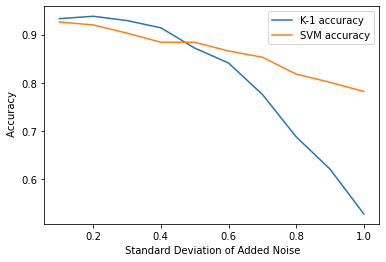

In [17]:
# plotiing the KNN and SVM accuracies vs standard deviation values
print("TAsk 3- Ploting K-1 and SM accuracy for 200 dimensions")

plt.plot(l2,ack,label='K-1 accuracy')

plt.legend()
xlabel = "Standard Deviation"

print( "Maximum K-1 classification accuracy(%) :",max(ack)*100 )


plt.plot(l2,ac_svm,label='SVM accuracy')

plt.legend()

plt.xlabel(" Standard Deviation of Added Noise")
plt.ylabel(" Accuracy")



print( "Maximum SVM classification accuracy(%) :",max(ac_svm)*100 )
plt.show()



In [18]:
 
KNN = classifier.fit(train_df1 ,y)
    
y_predicted_noise_0 = KNN.predict( test_df1)
    
KNN_accuracy_noise_0 = accuracy_score(y_test ,y_predicted_noise_0)
print("KNN_accuracy_noise Without PCA :", KNN_accuracy_noise_0)    
    
    
svmmodel.fit(train_df1 ,y)
y_svm_predicticted_noise_0 = svmmodel.predict(test_df1)
svmaccuracy_noise_0 = accuracy_score(y_test ,y_svm_predicticted_noise_0 ) 
print("svmaccuracy_noise Without PCA :", svmaccuracy_noise_0)

    


KNN_accuracy_noise Without PCA : 0.566
svmaccuracy_noise Without PCA : 0.861


In [19]:
# checking the accuracy of classifiers when the standard deviation is constant and the number of features vary
l3 = [2,3,4,5,6,7,8,9,10,14,18,22,26,30,34,38,42,50,70,100,125,150,175,200,225,256,300,400,500,600,700,800,1040]
ack_noise = []  # empty list to store accuracy of K-1 at various standard deviations
ac_svm_noise =[]# empty list to store accuracy of SVM at various standard deviations
print()
print("-Task 5---Nois sigma = 1----K-1 and SVM Classification---------------")
print("--Dimensions -[2,3,4,5,6,7,8,9,10,14,18,22,26,30,34,38,42,50,70,100,125,150,175,200,225,256,300,400,500,600,700,800,1040]")

for l in l3:
    
# Project the data onto the primary principal components
    #pca = PCA1(l)
    m3,ev3,pro3, eval3= PCA_fit(train_df1, l)

    train_df1_projected = PCA_transform(train_df1, m3,ev3)

    
    test_df1_projected = PCA_transform(test_df1, m3,ev3)

    
    KNN = classifier.fit(train_df1_projected  ,y)
    
    y_predicted_noise = KNN.predict( test_df1_projected)
    
    KNN_accuracy_noise = accuracy_score(y_test ,y_predicted_noise)
    ack_noise.append(KNN_accuracy_noise)
    
    
    
    svmmodel.fit(train_df1_projected ,y)
    y_svm_predicticted_noise = svmmodel.predict(test_df1_projected)
    svmaccuracy_noise = accuracy_score(y_test ,y_svm_predicticted_noise ) 
    ac_svm_noise.append(svmaccuracy_noise)

    
print("KNN Accuracy list", ack_noise )
    
print("SVM Accuracy list", ac_svm_noise  )





-Task 5---Nois sigma = 1----K-1 and SVM Classification---------------
--Dimensions -[2,3,4,5,6,7,8,9,10,14,18,22,26,30,34,38,42,50,70,100,125,150,175,200,225,256,300,400,500,600,700,800,1040]
KNN Accuracy list [0.388, 0.419, 0.575, 0.679, 0.748, 0.789, 0.818, 0.818, 0.825, 0.766, 0.75, 0.754, 0.721, 0.703, 0.693, 0.678, 0.661, 0.607, 0.612, 0.562, 0.537, 0.513, 0.518, 0.528, 0.502, 0.489, 0.547, 0.571, 0.568, 0.57, 0.567, 0.566, 0.566]
SVM Accuracy list [0.442, 0.482, 0.626, 0.726, 0.773, 0.807, 0.829, 0.838, 0.829, 0.84, 0.837, 0.837, 0.83, 0.826, 0.829, 0.832, 0.827, 0.835, 0.83, 0.8, 0.779, 0.775, 0.776, 0.782, 0.778, 0.774, 0.828, 0.853, 0.862, 0.861, 0.862, 0.861, 0.861]


Maximum K-1 classification accuracy(%) : 82.5
Maximum SVM classification accuracy(%) : 86.2


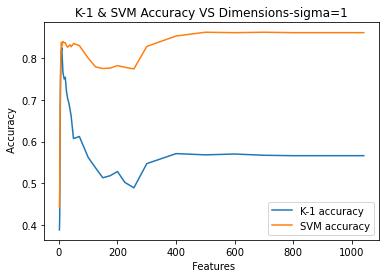

In [20]:
# plotiing the KNN and SVM accuracies vs standard deviation values

plt.plot(l3,ack_noise,label='K-1 accuracy')
plt.legend()
xlabel = "Features"
plt.title("K-1 & SVM Accuracy VS Dimensions-sigma=1")
print( "Maximum K-1 classification accuracy(%) :",max(ack_noise)*100 )


plt.plot(l3,ac_svm_noise,label='SVM accuracy')
plt.legend()
plt.xlabel(" Features")
plt.ylabel(" Accuracy")
print( "Maximum SVM classification accuracy(%) :",max(ac_svm_noise)*100 )
plt.show()



# TASK 3

In [21]:
class KMeans_clustering:
    def __init__(self, k=2, maximum_iterations = 250, dummy = 0):
        self.k = k
        self.maximum_iterations = maximum_iterations
        self.dummy = dummy
        
            
        
# defining the fit method for the clustering
    
    def fit(self,Data_X,Data_y):
        
        self.error = [] # to plot the rror function against iterations of KMEans

        self.centroids = {} # initializing an empty dict for centroids and assigning the vlaues for centroids
        
        
        if self.dummy == 0:
            
            
            
            for ran in range(self.k): # as we do not have any contstarints on the initializiationin of centroids in in task 3
                                         #taking the first k obesrevations as centroids
                self.centroids[ran] = Data_X[ran,:]
                
        else:
            
            for l in range(self.k): # assigning random sample from each class as centroid # Task 4
                temp = self.dummy
                while temp < Data_X.shape[0]:
                    if int(Data_y[temp])== l:
                        self.centroids[l] = Data_X[temp,:]
                        break
                    temp = temp + 1
        
              
        iteration =0
        while iteration < self.maximum_iterations:
        
            self.clusters = {} # keys will be the centroids and values will be the featuresets 

            for i in range(self.k):
                self.clusters[i] = [] # featureset of the clusters dict

            for feature_set in Data_X: # calculating the distance from the cenntroid and assigining the clusters
                euclidean_distances = [np.linalg.norm(feature_set-self.centroids[i]) for i in self.centroids]
                classification = euclidean_distances.index(min(euclidean_distances))
                self.clusters[classification].append(feature_set)

            old_centroids = dict(self.centroids)

            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)

            err = 0
            for centroid in self.centroids:
                actual_centroid = old_centroids[centroid]
                present_centroid = self.centroids[centroid]
                err += np.linalg.norm(actual_centroid-present_centroid)
        
            self.error.append(err)
            print('Itteration:',iteration+1, "error :", err)
            
            iteration = iteration +1

# defininig the predict method        
    def predict(self,Data_X):
        euclidean_distances = [np.linalg.norm(Data_X-self.centroids[i]) for i in self.centroids]
        classification = euclidean_distances.index(min(euclidean_distances))
        return classification

In [22]:
print("----------------TASK 3 Checking----------------------------------------------------------------------")

clust = KMeans_clustering(10,100, 0)
clust.fit(x, y)

print("----------------TASK 4 Checking--Centroid with constraints------------------------------------------")
clust1 = KMeans_clustering(10,100, 1500)
clust1.fit(x, y)

----------------TASK 3 Checking----------------------------------------------------------------------
Itteration: 1 error : 163.648505564906
Itteration: 2 error : 39.44181019294301
Itteration: 3 error : 22.5588166696375
Itteration: 4 error : 16.34033218273496
Itteration: 5 error : 14.501801845083826
Itteration: 6 error : 13.321306588008476
Itteration: 7 error : 12.14380910141091
Itteration: 8 error : 10.504190004323382
Itteration: 9 error : 9.037974631501719
Itteration: 10 error : 7.837195758381149
Itteration: 11 error : 6.824653222835168
Itteration: 12 error : 6.815924452784151
Itteration: 13 error : 6.300712371674826
Itteration: 14 error : 6.3588004868442365
Itteration: 15 error : 5.229445187767605
Itteration: 16 error : 4.792332407998108
Itteration: 17 error : 3.4461631239698116
Itteration: 18 error : 3.4687027154117196
Itteration: 19 error : 3.144704432817163
Itteration: 20 error : 3.7449453731583695
Itteration: 21 error : 3.4608431063216942
Itteration: 22 error : 2.927177786895401

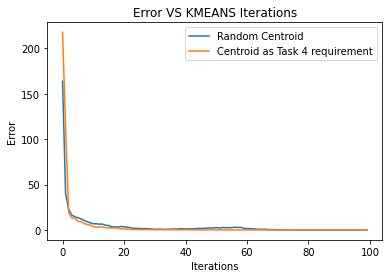

In [23]:
plt.plot(clust.error, label ='Random Centroid')
plt.plot(clust1.error, label = 'Centroid as Task 4 requirement')
plt.legend()
plt.title("Error VS KMEANS Iterations")
plt.xlabel('Iterations')
plt.ylabel('Error')
        
plt.show()

# TASK 4-- By passing some '"dummy" value while creating the kmeans instance random sample (centroid as per the given condition) is created 

In [24]:

print("-----------------TASK 4-------------------------------------------------------------------------")
l4 = [10,40,80,120,160,200,256,500, 784] # number of components 

C = [] # to store the averages


for l in l4:
    
# Project the data onto the 2 primary principal components
    
    m4,ev4,pro4, eval4 = PCA_fit(x,l)

    X_projected_4 = PCA_transform(x,m4,ev4)

    print('Shape of X:', x.shape)

    print('Shape of transformed X:', X_projected_4.shape)


    print("Checking---------------------------------------------------------------------------")

    #pca.fit(x_test)

    X_test_projected_4 = PCA_transform(x_test, m4, ev4)

    print('Shape of X_test:', x_test.shape)

    print('Shape of transformed X_test:', X_test_projected_4.shape)


    print("Checking---------------------------------------------------------------------------")
    
    clust4 = KMeans_clustering(10,60, 1000)
    clust4.fit(X_projected_4, y)
    
    
    correct,total = {},{}
    i = 0
    while i < 10:
        correct[i] = 0
        total[i] = 0
        i = i+1

    for p in range(X_projected_4.shape[0]):
        total[y[p]] += 1
        prediction = clust4.predict(X_projected_4[p])
        if prediction == y[p]:
            correct[prediction] += 1
            
            
    averages = 0
    for q in range(10):
        print('class:',q,'|','% correct:',correct[q]*100/total[q])
        averages += correct[q]*100/total[q]
    print()
    print('Average % :',averages/10,'\n')
    C.append(averages/10)
  

    

-----------------TASK 4-------------------------------------------------------------------------
Shape of X: (6000, 784)
Shape of transformed X: (6000, 10)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 10)
Checking---------------------------------------------------------------------------
Itteration: 1 error : 57.007355753313234
Itteration: 2 error : 18.69538969776878
Itteration: 3 error : 11.849355065484742
Itteration: 4 error : 9.697280190487355
Itteration: 5 error : 7.905283364371685
Itteration: 6 error : 5.9060820358066275
Itteration: 7 error : 4.710485431905534
Itteration: 8 error : 3.8752542627197806
Itteration: 9 error : 3.6826905903482694
Itteration: 10 error : 3.5486676044761207
Itteration: 11 error : 4.742469292565539
Itteration: 12 error : 5.500084775217111
Itteration: 13 error : 5.4812455959976445
Itteration: 14 error : 4.82042128623045
Itteration: 15 error : 4.90910878104

Itteration: 50 error : 0.0
Itteration: 51 error : 0.0
Itteration: 52 error : 0.0
Itteration: 53 error : 0.0
Itteration: 54 error : 0.0
Itteration: 55 error : 0.0
Itteration: 56 error : 0.0
Itteration: 57 error : 0.0
Itteration: 58 error : 0.0
Itteration: 59 error : 0.0
Itteration: 60 error : 0.0
class: 0 | % correct: 63.3445945945946
class: 1 | % correct: 97.91356184798808
class: 2 | % correct: 33.734939759036145
class: 3 | % correct: 1.1513157894736843
class: 4 | % correct: 0.32102728731942215
class: 5 | % correct: 2.3346303501945527
class: 6 | % correct: 79.27631578947368
class: 7 | % correct: 46.54377880184332
class: 8 | % correct: 35.93466424682396
class: 9 | % correct: 50.08319467554077

Average % : 41.063802314228816 

Shape of X: (6000, 784)
Shape of transformed X: (6000, 120)
Checking---------------------------------------------------------------------------
Shape of X_test: (1000, 784)
Shape of transformed X_test: (1000, 120)
Checking-------------------------------------------

Itteration: 23 error : 2.91432520669881
Itteration: 24 error : 2.764475740567602
Itteration: 25 error : 2.9630161962366195
Itteration: 26 error : 3.1322536183561267
Itteration: 27 error : 2.6323328906185153
Itteration: 28 error : 3.2721093041735054
Itteration: 29 error : 2.6746535587104616
Itteration: 30 error : 2.594219913416922
Itteration: 31 error : 2.2171522791527316
Itteration: 32 error : 2.6484818916372674
Itteration: 33 error : 1.7012086304284675
Itteration: 34 error : 1.751971667580961
Itteration: 35 error : 1.2235378667361643
Itteration: 36 error : 1.1818199129572016
Itteration: 37 error : 0.9168516827771171
Itteration: 38 error : 1.0374227931161661
Itteration: 39 error : 0.830507152654463
Itteration: 40 error : 0.8536137538720432
Itteration: 41 error : 0.5433440153281424
Itteration: 42 error : 0.7405696815222226
Itteration: 43 error : 0.4025032424002202
Itteration: 44 error : 0.3573197621014229
Itteration: 45 error : 0.24820532195693734
Itteration: 46 error : 0.18648468514376

Itteration: 1 error : 155.42423345945323
Itteration: 2 error : 32.55903666214099
Itteration: 3 error : 18.30976063716417
Itteration: 4 error : 11.320089253856366
Itteration: 5 error : 8.207661465365645
Itteration: 6 error : 7.172418223529871
Itteration: 7 error : 6.2965393065392465
Itteration: 8 error : 4.371942518119779
Itteration: 9 error : 4.359780428895278
Itteration: 10 error : 3.707393075830624
Itteration: 11 error : 3.585304879895019
Itteration: 12 error : 3.090378358386914
Itteration: 13 error : 2.76293008598084
Itteration: 14 error : 2.553577960253318
Itteration: 15 error : 2.78426729702607
Itteration: 16 error : 2.9005418724743555
Itteration: 17 error : 2.6639909489451954
Itteration: 18 error : 3.2012147638055626
Itteration: 19 error : 3.7291096324833797
Itteration: 20 error : 3.483217357003063
Itteration: 21 error : 3.336903012089121
Itteration: 22 error : 2.574305867186719
Itteration: 23 error : 2.319431116192971
Itteration: 24 error : 1.6295985512593107
Itteration: 25 erro

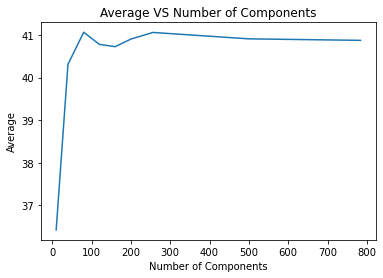

Average : [36.42486799044896, 40.310458460408036, 41.063802314228816, 40.77864499593195, 40.725541907509694, 40.90326050973289, 41.059149414275275, 40.9088158388481, 40.873455314562726]


In [25]:
plt.plot(l4,C)
plt.title("Average VS Number of Components")
plt.xlabel('Number of Components')
plt.ylabel('Average')
        
plt.show()
print("Average :",C)

In [26]:
X_projected_4.shape[0]

6000

In [27]:
C

[36.42486799044896,
 40.310458460408036,
 41.063802314228816,
 40.77864499593195,
 40.725541907509694,
 40.90326050973289,
 41.059149414275275,
 40.9088158388481,
 40.873455314562726]